# LOAN DEFAULT PREDICTION

## Step1: Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step2: Data Understanding

In [9]:
#Load Dataset
df = pd.read_csv("C:\Loan_default.csv")

In [11]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [13]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [15]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [17]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [19]:
df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [27]:
df.size

4596246

In [29]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

## Step3: Data Cleaning

In [32]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## Step4: Exploratory Data Analysis(EDA)

## 1.Bar Chart

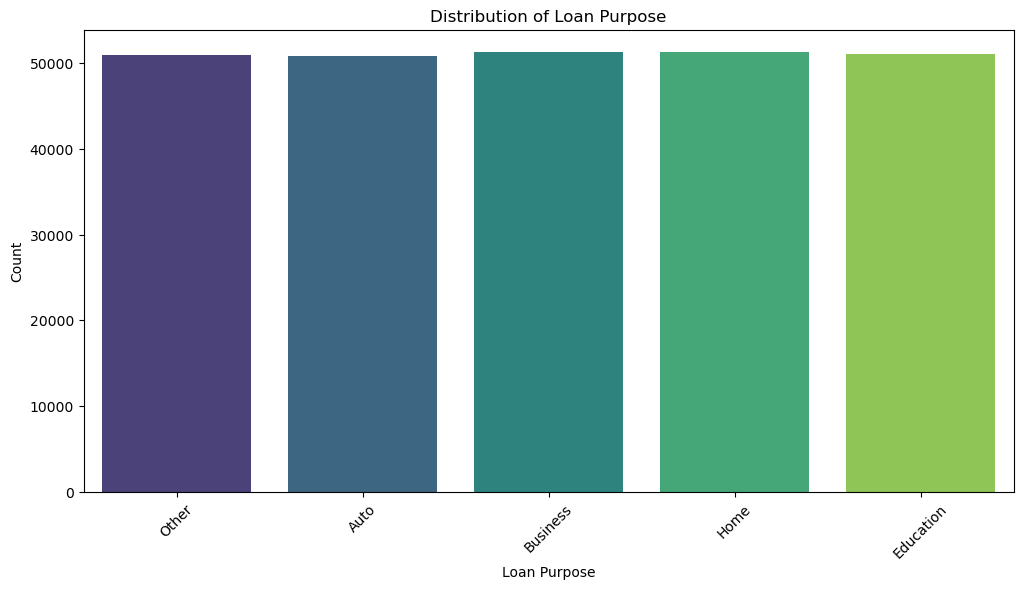

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='LoanPurpose', data=df, palette='viridis')
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 2.Line plot

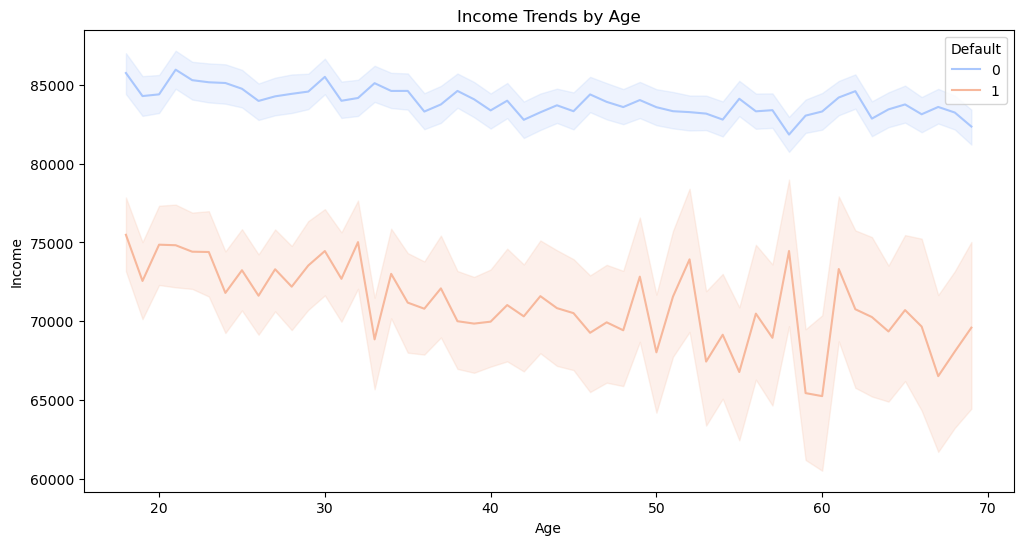

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Income', data=df, hue='Default', palette='coolwarm')
plt.title('Income Trends by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

## 3.Pie chart

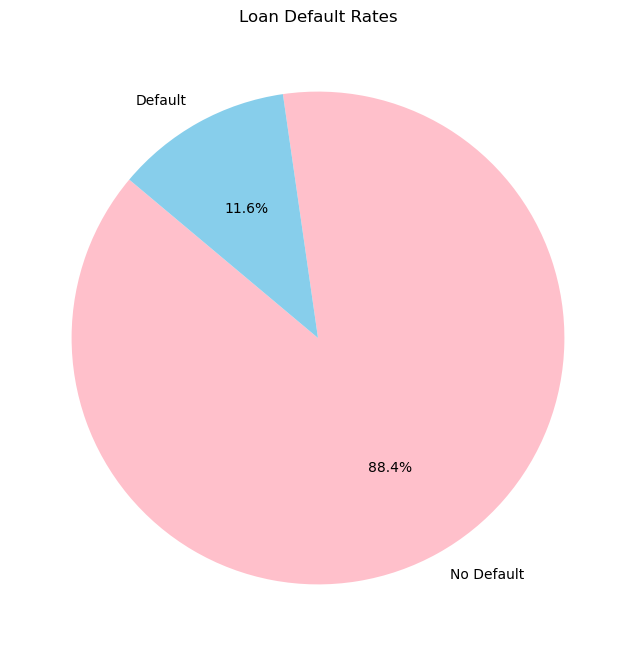

In [44]:
default_counts = df['Default'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(default_counts, labels=['No Default', 'Default'], autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Loan Default Rates')
plt.show()

## 4.Box plot

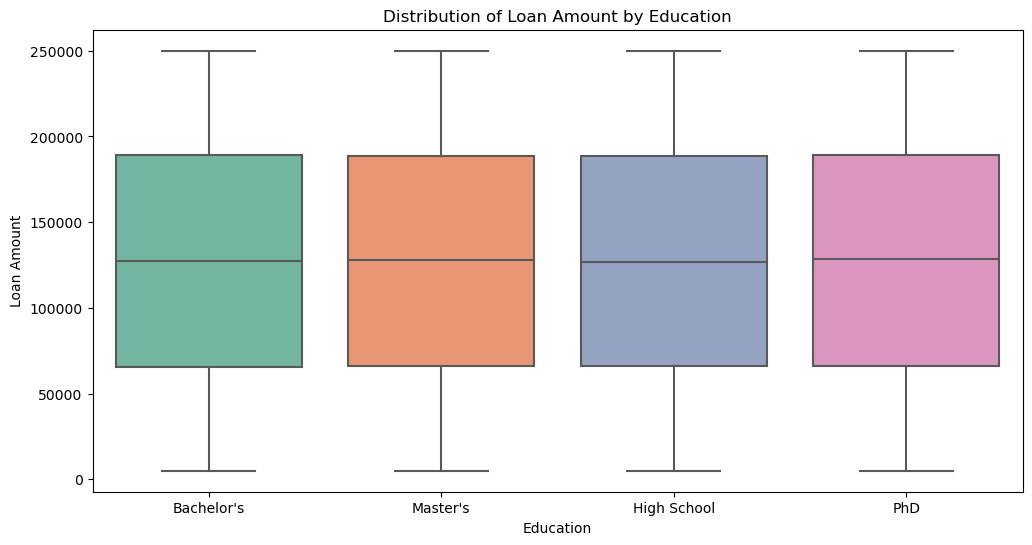

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='LoanAmount', data=df, palette='Set2')
plt.title('Distribution of Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

## 5.Violin Plot

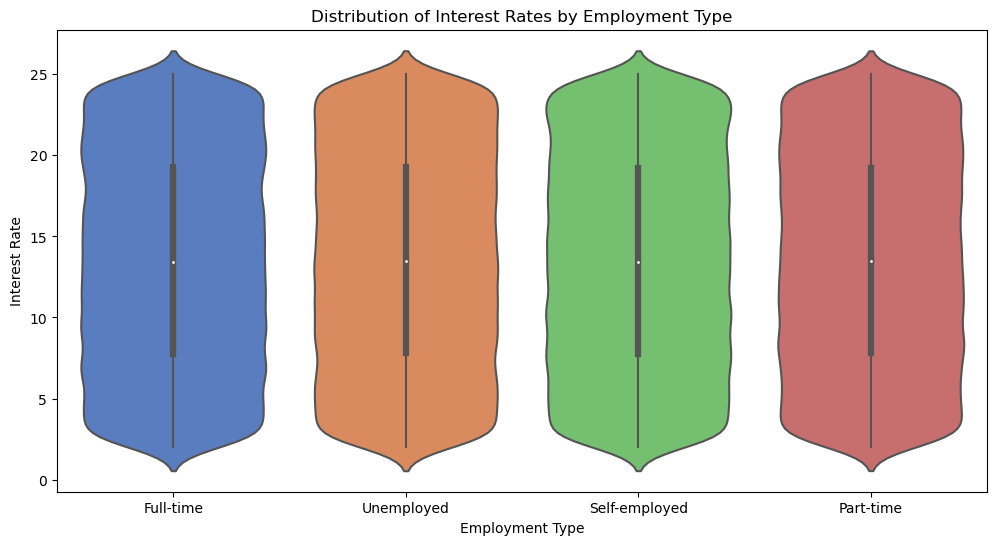

In [56]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='EmploymentType', y='InterestRate', data=df, palette='muted')
plt.title('Distribution of Interest Rates by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Interest Rate')
plt.show()

## 6.Density plot

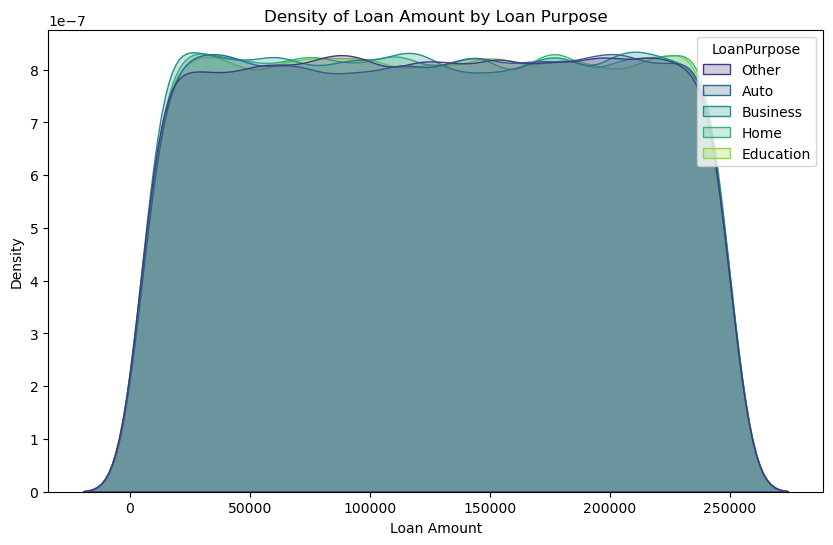

In [85]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='LoanAmount', hue='LoanPurpose', fill=True, palette='viridis')
plt.title('Density of Loan Amount by Loan Purpose')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

## 7.Stacked Bar Graph

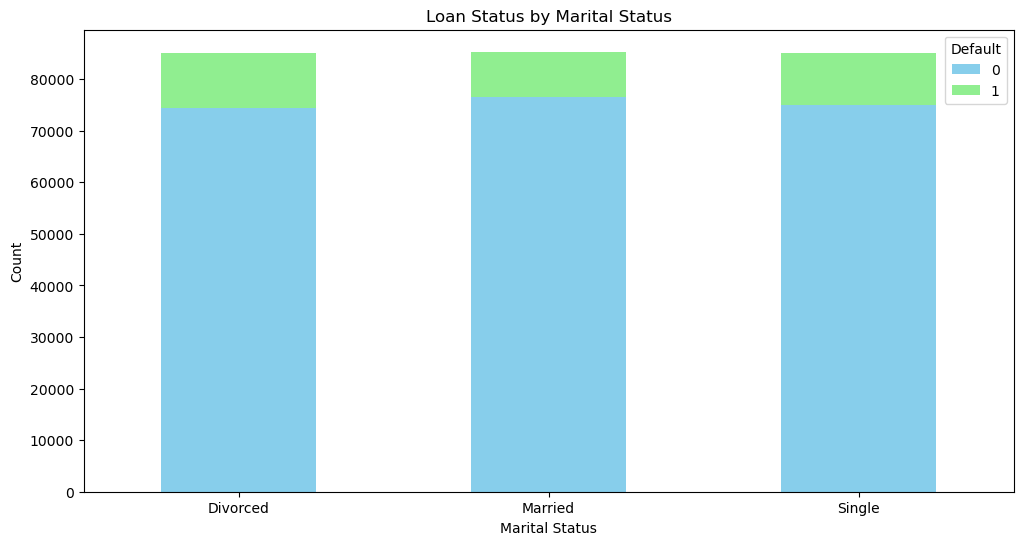

In [90]:
pivot_df = df.pivot_table(values='LoanID', index='MaritalStatus', columns='Default', aggfunc='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen'])
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 8. Histograms

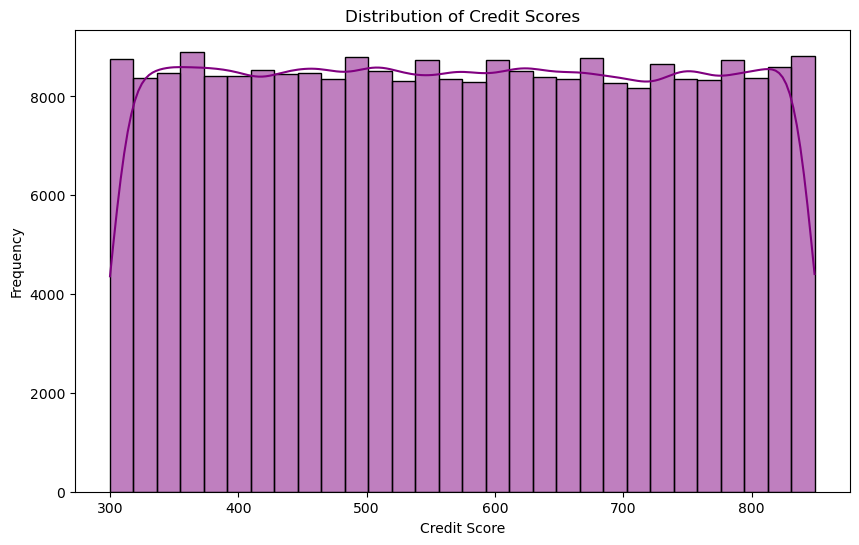

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='purple')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

## 9.Count Plot for Education Levels

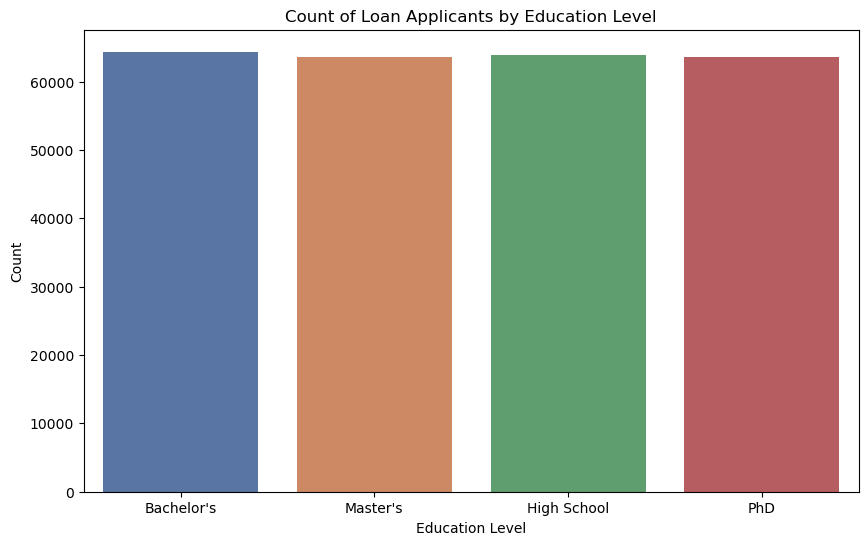

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, palette='deep')
plt.title('Count of Loan Applicants by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

## 10.Bar Plot for Loan Default by Credit Score Range

In [79]:
df['CreditScoreRange'] = pd.cut(df['CreditScore'], bins=[300, 500, 600, 700, 800, 850], labels=['300-500', '500-600', '600-700', '700-800', '800-850'])

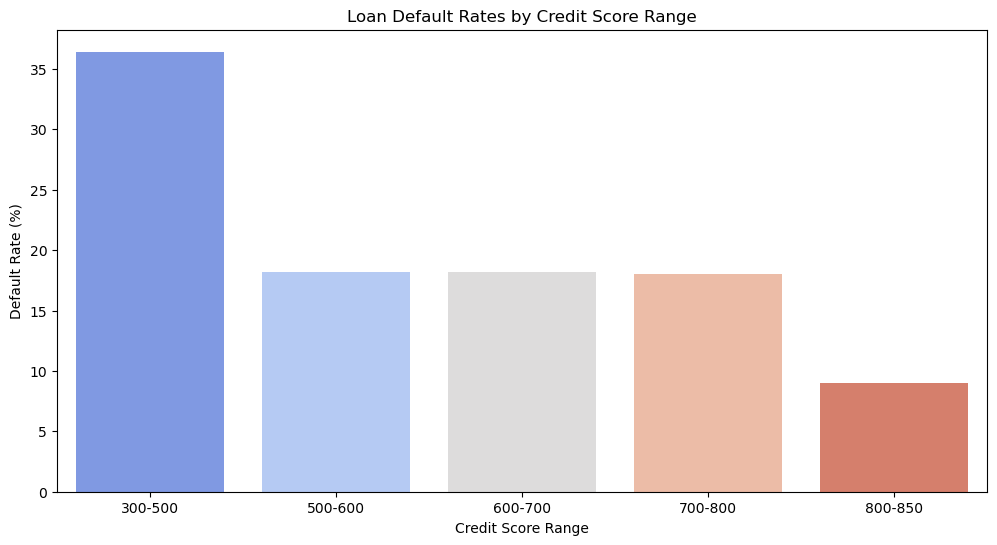

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x='CreditScoreRange', y='Default', data=df, estimator=lambda x: len(x) / len(df) * 100, palette='coolwarm')
plt.title('Loan Default Rates by Credit Score Range')
plt.xlabel('Credit Score Range')
plt.ylabel('Default Rate (%)')
plt.show()

## Step5: Feature Engineering

## Feature 1: Income-to-Loan Amount Ratio (ILR)

This feature will help understand how much of the applicant's income is being requested as a loan.

In [95]:
# Feature: Income-to-Loan Amount Ratio (ILR)
df['IncomeLoanRatio'] = df['Income'] / df['LoanAmount']
print(df['IncomeLoanRatio'].head())

0    1.699923
1    0.405272
2    0.651825
3    0.707895
4    2.236240
Name: IncomeLoanRatio, dtype: float64


## Step6: Model Building

## 1.Filter Numeric Columns

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
# Filter for only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

In [110]:
# Create new feature: Income-to-Loan Amount Ratio (ILR)
df_numeric['IncomeLoanRatio'] = df_numeric['Income'] / df_numeric['LoanAmount']

In [114]:
# Define features and target
features = df_numeric.drop(['Default'], axis=1)
target = df_numeric['Default']

## 2.Split the Data

In [116]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## 3.Initialize and Train the Model

In [118]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## 4.Evaluate the Model

In [120]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[45139    31]
 [ 5828    72]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.70      0.01      0.02      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.48     51070
weighted avg       0.86      0.89      0.83     51070



## Step7: Model Evaluation

## 1.Confusion Matrix

Provides a summary of prediction results on a classification problem.

In [129]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[45139    31]
 [ 5828    72]]


## 2.Classification Report

Provides precision, recall, F1-score, and support for each class.

In [133]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.70      0.01      0.02      5900

    accuracy                           0.89     51070
   macro avg       0.79      0.51      0.48     51070
weighted avg       0.86      0.89      0.83     51070



## 3.ROC Curve and AUC Score

Evaluates the model's performance across all classification thresholds.

In [137]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the ROC curve and AUC score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

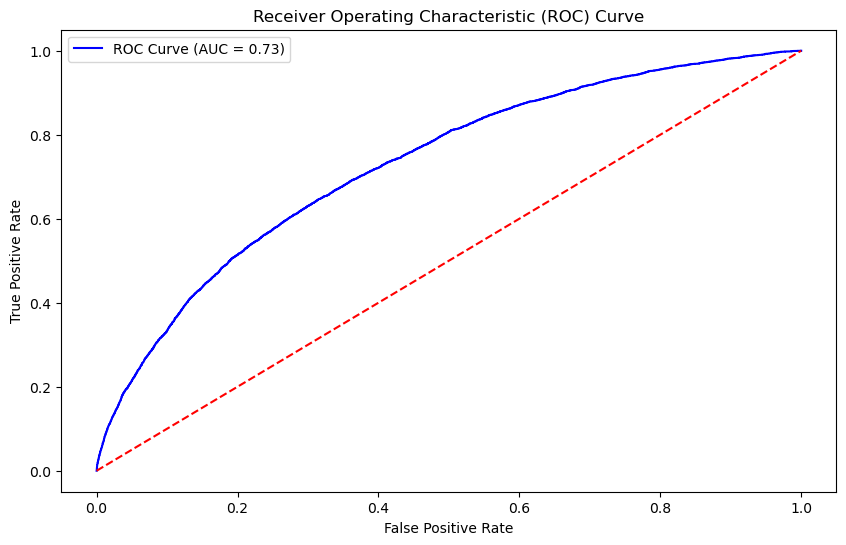

In [139]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Step8: Model Optimization

Steps for Model Optimization:

Hyperparameter Tuning with Grid Search:

Grid Search will help you find the best hyperparameters for your model by trying out different combinations.

## 1.Import Necessary Libraries

In [145]:
from sklearn.model_selection import GridSearchCV

## 2.Define Parameter grid

In [148]:
# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

## 3.Perform Grid Search

In [151]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [153]:
# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [157]:
# Get best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}


## 4.Train Final Model with Best Parameters

In [160]:
# Train final model with best parameters
final_model = LogisticRegression(**best_params, random_state=42)
final_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [162]:
# Make final predictions and evaluate the model
final_y_pred = final_model.predict(X_test)
print(confusion_matrix(y_test, final_y_pred))
print(classification_report(y_test, final_y_pred))

[[45153    17]
 [ 5863    37]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.69      0.01      0.01      5900

    accuracy                           0.88     51070
   macro avg       0.79      0.50      0.48     51070
weighted avg       0.86      0.88      0.83     51070



Explanation:

Parameter Grid: Defines the parameters and their possible values to try.

Grid Search: Searches for the best combination of hyperparameters.

Train Final Model: Uses the best parameters found to train the final model and evaluate its performance.